# Fitting Data

In [416]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy import units as u
from astropy import constants as const


from scipy.optimize import curve_fit

---

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

---

* The Apollo lunar mission deployed a series of experiments on the Moon.
* The experiment package was called the Apollo Lunar Surface Experiments Package [(ALSEP)](https://en.wikipedia.org/wiki/Apollo_Lunar_Surface_Experiments_Package)
* The ALSEP was powered by a radioisotope thermoelectric generator [(RTG)](https://en.wikipedia.org/wiki/Radioisotope_thermoelectric_generator)
* An RTG is basically a fist-sized slug of Pu-238 wrapped in a material that generates electric power when heated.
* Since the RTG is powered by a radioisotope, the output power decreases over time as the radioisotope decays.

---
## Read in the datafile

The data file `/Data/Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [417]:
my_data1 = pd.read_csv('./Data/Apollo_RTG.csv')
my_data1.head()

,Day,Power
0,34.4342,73.786264
1,151.3030,73.454312
2,297.2840,72.385425
3,443.4230,72.297457
4,584.6110,71.719237


## Plot the Data

* Day vs. Power
* Fit the function with a (degree >= 3) polynomial
* Plot the fit with the data
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels)

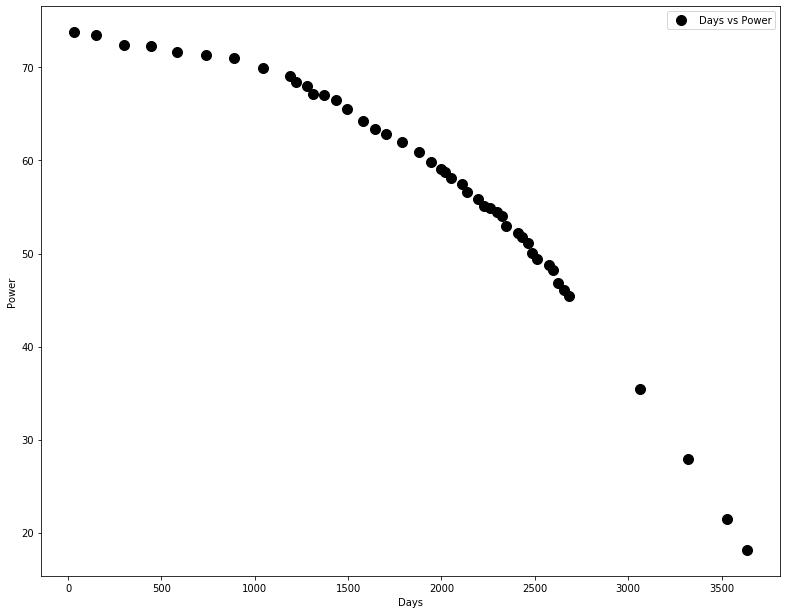

In [418]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Days")
ax.set_ylabel("Power")

ax.plot(my_data1['Day'], my_data1['Power'],
        color = "black",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Days vs Power")

ax.legend(loc=0);

In [419]:
my_fit1 = np.polyfit(my_data1['Day'], my_data1['Power'], 3)

my_fit1 #apply polynomial x, y, n

array([-4.93729802e-10, -2.22079130e-06, -7.45757249e-04,  7.34013618e+01])

In [420]:
fitted_polynomial = np.poly1d(my_fit1)
fitted_polynomial #plot

poly1d([-4.93729802e-10, -2.22079130e-06, -7.45757249e-04,  7.34013618e+01])

In [421]:
my_data1['Fit'] = fitted_polynomial(my_data1['Day']) #add to table

In [422]:
my_data1.head()

,Day,Power,Fit
0,34.4342,73.786264,73.373029
1,151.3030,73.454312,73.235977
2,297.2840,72.385425,72.970420
3,443.4230,72.297457,72.590968
4,584.6110,71.719237,72.107736


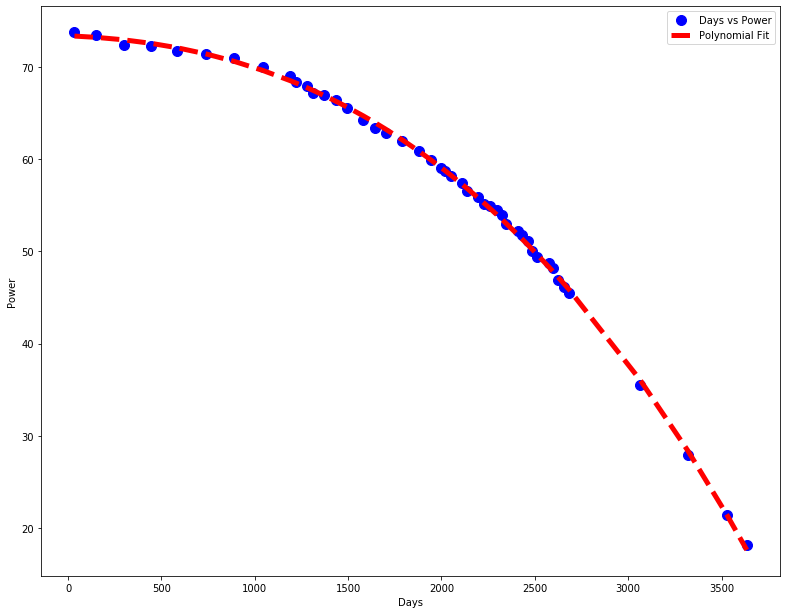

In [423]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Days")
ax.set_ylabel("Power")

ax.plot(my_data1['Day'], my_data1['Power'],
        color = "blue",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label =  "Days vs Power")

ax.plot(my_data1['Day'], my_data1['Fit'],
        marker = "None",
        linewidth = 5,
        color = 'red',
        linestyle = '--',
        label = "Polynomial Fit")

ax.legend(loc=0);

## Power over time

* All of your answer should be formatted as sentences
* For example: `The power on day 0 is VALUE Watts`
* Do not pick the complex roots!

### 1 - What was the power output on Day 0?

In [424]:
fitted_polynomial(0)    

73.40136180091334

In [425]:
f" The power output on Day 0 is = {fitted_polynomial(0)*u.watt:0.2f} (Watts)"

' The power output on Day 0 is = 73.40 W (Watts)'

### 2 - How many years after landing could you still power a 60 W lightbulb?

In [426]:
x = (fitted_polynomial-60).roots
y =np.isreal(x)
mask1 = np.where(y==True)
z = x[mask1]
z[0]

(1939.431618379499+0j)

In [427]:
f"  {(np.real(z[0])/365)*u.yr:.2f}, {60*u.W}" #real only takes the real part of the value we are working with

'  5.31 yr, 60.0 W'

In [428]:
#x = 15 + 6j
#np.real(x)

### 3 - How many years after landing could you still power a 5 W USB device?

In [429]:
x2 = (fitted_polynomial-5).roots
y2 =np.isreal(x2)
mask2 = np.where(y2==True)
z2 = x2[mask2]
z2[0]

(3959.0953588394955+0j)

In [430]:
f"  {(np.real(z2[0])/365)*u.yr:.2f}, {5*u.W}"

'  10.85 yr, 5.0 W'

### 4 - How many years after landing until the power output is 0 W?

In [431]:
x3 = (fitted_polynomial-0).roots
y3 =np.isreal(x3)
mask3 = np.where(y3==True)
z3 = x3[mask3]
z3[0]

(4076.728288796635+0j)

In [432]:
f"  {(np.real(z3[0])/365)*u.yr:.2f}, {0*u.W}"

'  11.17 yr, 0.0 W'

---

# Fitting data to a function

* The datafile `./Data/linedata.csv` contains two columns of data
* Plot the data (with labels!)
* Fit the function below to the data
* Find the values `(A,C,W)` that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

----

#### Fit a gaussian of the form:

$$ \huge f(x) = A e^{-\frac{(x - C)^2}{W}} $$

* A = amplitude of the gaussian
* C = x-value of the central peak of the gaussian
* W = width of the gaussian


In [433]:
line_data = pd.read_csv('./Data/linedata.csv')
line_data.head(100)

,wavelength,flux
0,0.0,-0.305196
1,0.1,0.004932
2,0.2,0.192535
3,0.3,0.100639
4,0.4,0.244992
...,...,...
95,9.5,0.189405
96,9.6,0.243728
97,9.7,0.411963
98,9.8,0.080682


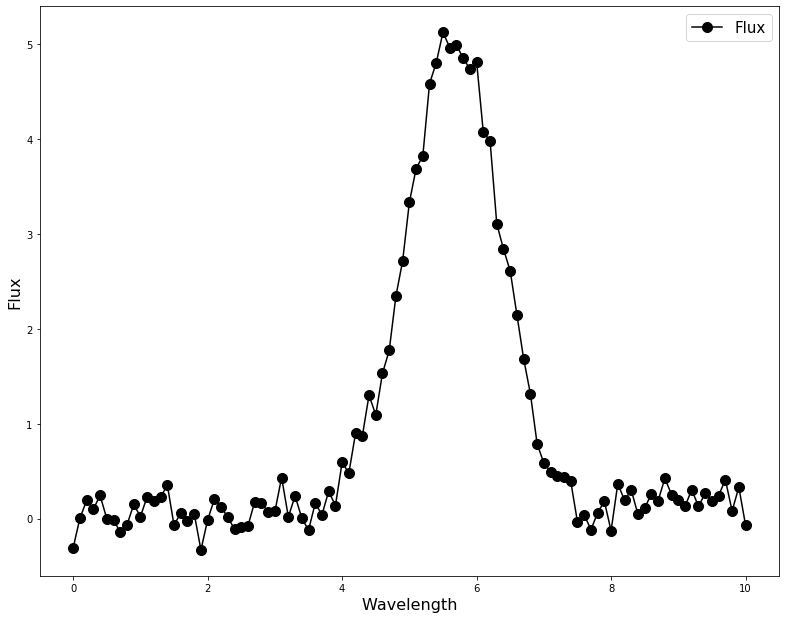

In [434]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()

ax.plot(line_data['wavelength'], line_data['flux'], marker = 'o', color = 'black', markersize = 10, label = 'Flux')

ax.set_xlabel('Wavelength', size = 16)
ax.set_ylabel('Flux', size = 16)
ax.legend(prop = {'size' : 15})

In [435]:
def gaussian(x,A,C,W):
    return A*np.exp((-(x-C)**2)/W) #this function returns f(x)

In [436]:
my_guess_A = 5.15
my_guess_C = 5.50
my_guess_W = 1.00

init_guesses = [my_guess_A, my_guess_C, my_guess_W]

In [437]:
fitpars, error = curve_fit(gaussian, line_data['wavelength'], line_data['flux'], p0 = init_guesses)

print(fitpars)

[5.07800585 5.6586608  0.97344409]


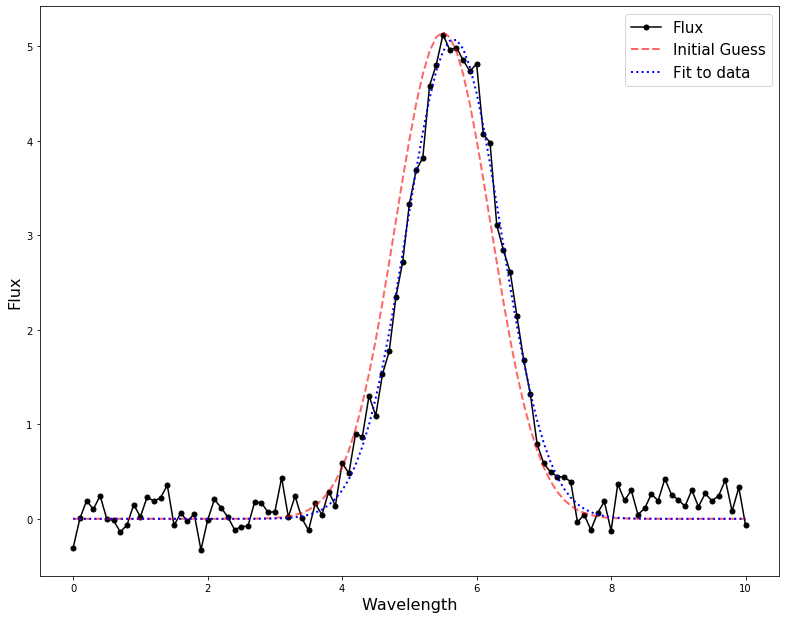

In [438]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()

ax.plot(line_data['wavelength'], line_data['flux'], marker = '.', color = 'black', markersize = 10, label = 'Flux')

ax.plot(line_data['wavelength'], gaussian(line_data['wavelength'], *init_guesses),
        color = "red",
        alpha = 0.6,
        marker = "None",
        linestyle = "--",
        linewidth = 2,
        label = "Initial Guess")

ax.plot(line_data['wavelength'], gaussian(line_data['wavelength'], *fitpars), 
        color = "blue",
        marker = "None",
        linestyle = ":",
        linewidth = 2,
        label = "Fit to data")


ax.set_xlabel('Wavelength', size = 16)
ax.set_ylabel('Flux', size = 16)
ax.legend(prop = {'size' : 15})

---

# Stellar Spectra

#### The file `./Data/StarData.csv` is a spectra of a main sequence star

* Col 1 - Wavelength `[angstroms]`
* Col 2 - Flux `[normalized to 0->1]`

#### Read in the Data

In [439]:
star_data = pd.read_csv('./Data/Stardata.csv')
star_data.head(1000)

,wavelength,flux
0,1150.0,0.000000
1,1155.0,0.000000
2,1160.0,0.000000
3,1165.0,0.000000
4,1170.0,0.000000
...,...,...
995,6125.0,0.941550
996,6130.0,0.936374
997,6135.0,0.928843
998,6140.0,0.919292


#### Plot the Data

* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

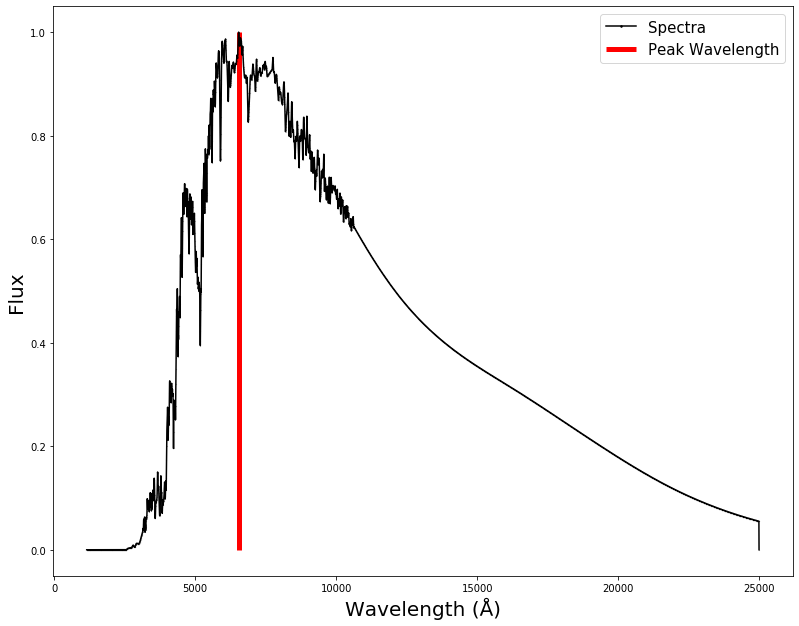

In [440]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()

ax.plot(star_data['wavelength'], star_data['flux'], marker= 'o', color = 'black', markersize = 0.1, label = 'Spectra')
ax.set_xlabel('Wavelength (\U0000212B)', size = 20)
ax.set_ylabel('Flux', size = 20)

ax.vlines(6540, 0, 1, color = 'red', linewidth = 5, linestyle = '-', label = "Peak Wavelength")

ax.legend(markerscale = 15, prop = {'size' : 15})

#### Use [Wien's law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law) to determine the temperature of the Star

* You will need to find the wavelength where the Flux is at a maximum
* Use the Astropy units and constants - do not hardcode

In [441]:
def calc_temp(lambda_peak):
    T = const.b_wien/lambda_peak
    return T.decompose()

In [442]:
idx = star_data['flux'].idxmax() #find the max
lambda_peak = star_data['wavelength'][idx]*u.AA

lambda_peak

<Quantity 6540. Angstrom>

In [443]:
T = calc_temp(lambda_peak)
f'The temperature of the main sequence star is {T:.2f}.'

'The temperature of the main sequence star is 4430.84 K.'

#### [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law)

* [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law) describes the spectra emitted by a blackbody at a temperature T
* You will want to look at the $\lambda$ version
* Write a function to calculate the blackbody flux, at the above temperature, for all of your data_wavelength points
* Use the Astropy units and constants - do not hardcode
* Scale the blackbody flux to `[0->1]`
* Add a column to the table: `Blackbody`

In [444]:
from astropy.table import QTable, Table

In [445]:
star_data_Q = QTable.read('./data/StarData.csv', format='ascii.csv')
star_data_Q['wavelength'].unit = u.angstrom #convert to angstrom

In [446]:
star_data_Q

wavelength,flux
Angstrom,
float64,float64
1150.0,0.0
1155.0,0.0
1160.0,0.0
1165.0,0.0
1170.0,0.0
1175.0,0.0
1180.0,0.0
1185.0,0.0


In [447]:
# Write a function
def calc_bFlux(wavelength, temperature):
    B = ((2*(const.h)*((const.c)**2))/(wavelength**5))/(np.exp(((const.h)*(const.c))/(wavelength*(const.k_B)*temperature))-1)
    return B.decompose()

In [448]:
# Apply the function
B_Flux_i = calc_bFlux(star_data_Q['wavelength'],T)
B_Flux_i

<Quantity [3.23243947e+06, 3.57434001e+06, 3.94861126e+06, ...,
           4.58206600e+11, 4.57912117e+11, 4.57617865e+11] kg / (m s3)>

In [449]:
radiant_flux_units = (u.W/((u.m)**3)).decompose() 
resultant_units = (u.kg/(u.m*(u.s)**3)).decompose()
radiant_flux_units == resultant_units

True

In [450]:
B_Flux = (B_Flux_i - B_Flux_i.min())/(B_Flux_i.max() - B_Flux_i.min())
B_Flux_units = B_Flux*(u.W/(u.sr*u.m**3))
star_data_Q['B_Flux'] = B_Flux_units

In [451]:
star_data_Q

wavelength,flux,B_Flux
Angstrom,,W / (m3 sr)
float64,float64,float64
1150.0,0.0,0.0
1155.0,0.0,4.888124453881602e-08
1160.0,0.0,1.0239050232118743e-07
1165.0,0.0,1.609122558529792e-07
1170.0,0.0,2.248581726430093e-07
1175.0,0.0,2.946686565277339e-07
1180.0,0.0,3.708144626172372e-07
1185.0,0.0,4.5379837705926186e-07


#### Plot the Data and the Blackbody fit on the same plot

* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

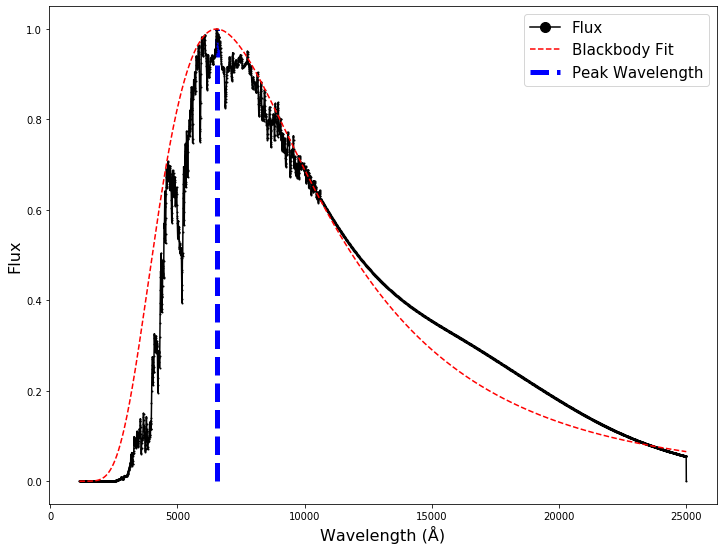

In [452]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,7.5)
fig.tight_layout()

ax.plot(star_data['wavelength'],star_data['flux'], marker = 'o', markersize = 1, color = 'black', label = 'Flux')

ax.plot(star_data['wavelength'],star_data_Q['B_Flux'], linestyle = '--', markersize = 1, label = 'Blackbody Fit', color = 'red')

ax.set_xlabel('Wavelength (\U0000212B)', size = 16)
ax.set_ylabel('Flux', size = 16)

ax.vlines(6540, 0,1, color = 'blue', linewidth = 5, linestyle = '--', label = "Peak Wavelength")

ax.legend(markerscale = 10, prop = {'size' : 15})

### Due Wed Feb 19 - 1 pm
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`